In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [4]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# manual assessing 
# seeking info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.dtypes
df.sex.unique()
df.sex = df.sex.map({'female':0, 'male':1})

In [15]:
df.smoker.unique()
df.smoker = df.smoker.map({'yes':1, 'no':0})

In [20]:
df.region.value_counts()
# frequency encoding 
df.region = df.region.map(df.region.value_counts().to_dict())

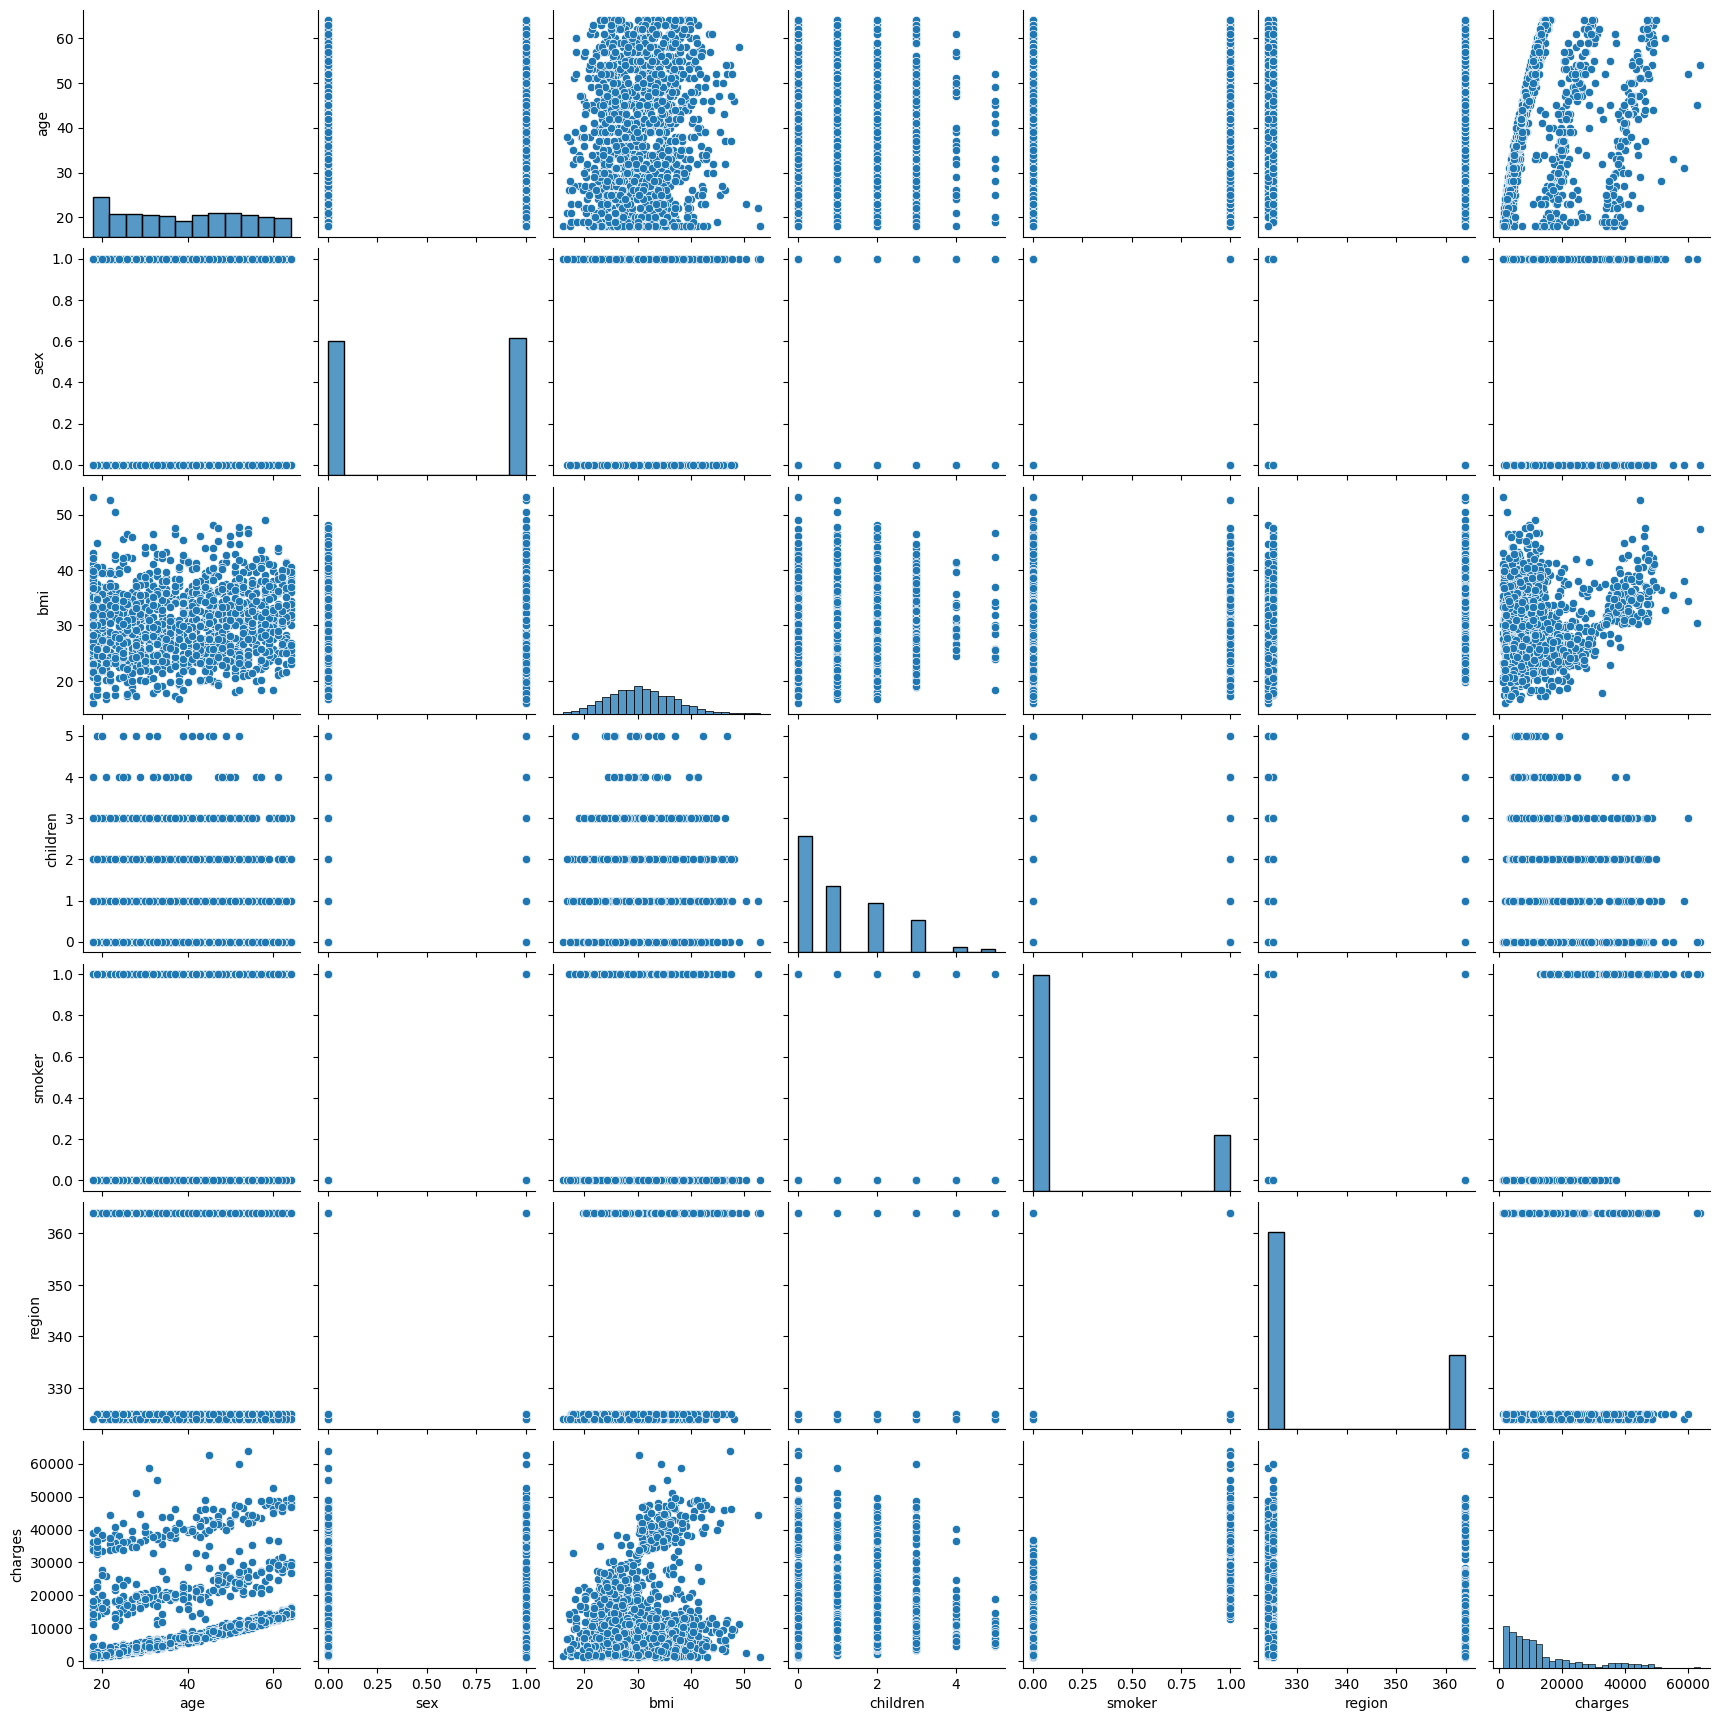

In [24]:
df
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.pairplot(df)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
x = df.drop('charges',axis=1)
y = df.charges

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
print('Training Size\t',x_train.shape[0])
print('Testing Size\t',x_test.shape[0])

Training Size	 1070
Testing Size	 268


In [31]:
lr = LinearRegression()
lr

LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(x_test)

In [35]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7822406663968002

In [39]:
df.columns

temp = df.drop(['sex', 'smoker', 'region'],axis=1).copy()
x = df.drop('charges',axis=1)
y = df.charges

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
print('Training Size\t',x_train.shape[0])
print('Testing Size\t',x_test.shape[0])

Training Size	 1070
Testing Size	 268


In [42]:
lr1 = LinearRegression()
lr1

LinearRegression()

In [43]:
lr1.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = lr1.predict(x_test)

In [46]:
r2_score(y_test,y_pred)

0.7822406663968002